# Project 2: Global Terrorism
Joshua Gardner

## Introduction

Understanding terrorism can help to drive policies and practices to help decrease the number of terroristic acts that are perpetrated throughout the world. Decreasing the amount of terrorism around the world will help to keep everyone safe and will hopefully raise the standard of living for everyone.

This project will be examining datasets examining terrorism. I will be looking to answer the following questions:

1. How does a region's instability influence the rates of terrorism?
2. Does strengthening a region's stability lower the terrorism rate of that region?
3. How can the different acts of terror be grouped together? Can anything be inferred by how the terroristic acts are grouped?
4. Does one region's terrorism cluster influence another region's cluster? Specifically, how does the terrorism cluster influence non-adjacent terrorism rates?

The first thing that I will need to do is start importing the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
coups = pd.read_excel('C:/Users/yasam/OneDrive/Documents/Grad School/DSC680 Applied Data Science/Project 2/Data/CSPCoupsAnnualv2018.xls')
displaced = pd.read_excel('C:/Users/yasam/OneDrive/Documents/Grad School/DSC680 Applied Data Science/Project 2/Data/Forcibly Displaced Popoulations 2008.xls')
fragility = pd.read_excel('C:/Users/yasam/OneDrive/Documents/Grad School/DSC680 Applied Data Science/Project 2/Data/State Fragility Index v2017.xls')
rand = pd.read_csv('C:/Users/yasam/OneDrive/Documents/Grad School/DSC680 Applied Data Science/Project 2/Data/RAND_Database_of_Worldwide_Terrorism_Incidents.csv', encoding='latin-1')

In [3]:
print('Coups:\n',coups.head(5), '\n\n\n\nDisplaced:\n', displaced.head(5), '\n\n\n\nFragility:\n',
      fragility.head(5), '\n\n\n\nRAND:\n', rand.head(5))

Coups:
    ccode scode      country  year  scoup1  atcoup2  pcoup3  apcoup4  agcoup  \
0    700   AFG  Afghanistan  1946       0        0       0        0       0   
1    700   AFG  Afghanistan  1947       0        0       0        0       0   
2    700   AFG  Afghanistan  1948       0        0       0        0       0   
3    700   AFG  Afghanistan  1949       0        0       0        0       0   
4    700   AFG  Afghanistan  1950       0        0       0        0       0   

   foroutex  reboutex  assassex  resignex  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0   



Displaced:
    ccode scode        country  year  source  idp   host
0      2   USA  United States  1964     0.0  0.0   96.0
1      2   USA  United States  1965     0.0  0.0   95.0
2      2   USA  United States  1966     0.0  0.0   97.0
3      2   US

Based on experience, I know that the `Date` column in the `rand` data is not in a `datetime` formate. Let's change it into a `datetime` format.

In [4]:
rand['Date'] = pd.to_datetime(rand['Date'])

Before I move on, let's check the types of each of the imported dataframes. I will need to ensure each is in the correct format before I can move onto exploring the different data sets.

In [5]:
print('Coups:\n',coups.dtypes,'\n\n\nDisplaced:\n', displaced.dtypes,
     '\n\n\nFragility:\n', fragility.dtypes, '\n\n\nRAND:\n', rand.dtypes)

Coups:
 ccode        int64
scode       object
country     object
year         int64
scoup1       int64
atcoup2      int64
pcoup3       int64
apcoup4      int64
agcoup       int64
foroutex     int64
reboutex     int64
assassex     int64
resignex     int64
dtype: object 


Displaced:
 ccode        int64
scode       object
country     object
year         int64
source     float64
idp        float64
host       float64
dtype: object 


Fragility:
 scode      object
country    object
year        int64
region      int64
sfi         int64
effect      int64
legit       int64
seceff      int64
secleg      int64
poleff      int64
polleg      int64
ecoeff      int64
ecoleg      int64
soceff      int64
socleg      int64
dtype: object 


RAND:
 Date           datetime64[ns]
City                   object
Country                object
Perpetrator            object
Weapon                 object
Injuries                int64
Fatalities              int64
Description            object
dtype: object


Looks like everything imported with the correct types. I may still need to modify these types later on, but we are good to start looking at each variable.

## Exploring Each Variable's Distributions

The first thing up is to start exploring each of the different variables within the four different datasets we will be looking at. Let's look at each individual dataset.

### Coups

First up is the dataset exploring coups throughout the years. The dataset contains information from 1946 to 2018. I want to look at two different groupings within this data. The number for each country over the years, and the combination for each year.

In [6]:
coups_countries = coups.groupby('country').sum()[['scoup1', 'atcoup2', 'pcoup3', 'apcoup4',
                               'agcoup', 'foroutex', 'reboutex', 'assassex',
                               'resignex']]
coups_year = coups.groupby('year').sum()[['scoup1', 'atcoup2', 'pcoup3', 'apcoup4',
                               'agcoup', 'foroutex', 'reboutex', 'assassex',
                               'resignex']]

I have my two different groupings within the data. Now let's look at the different histograms.

#### Grouped by Country

First ups is the grouping by country.

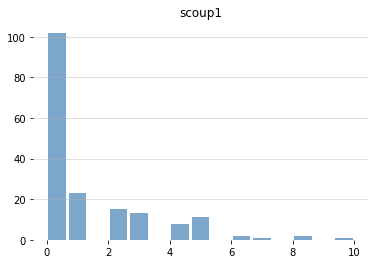

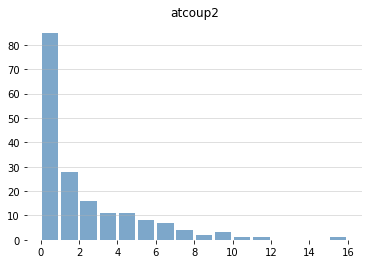

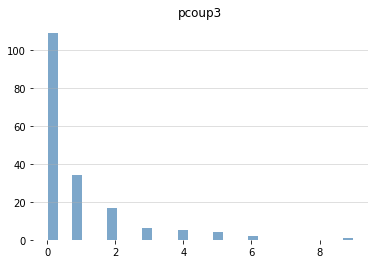

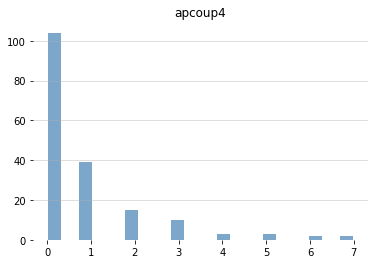

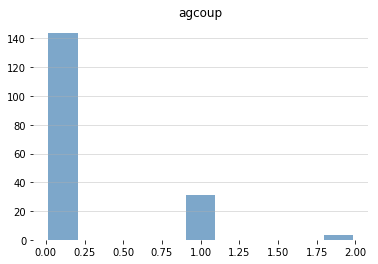

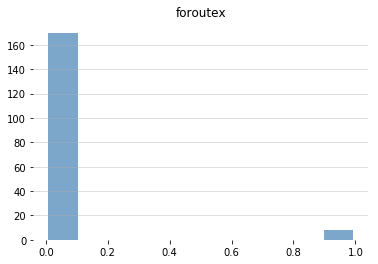

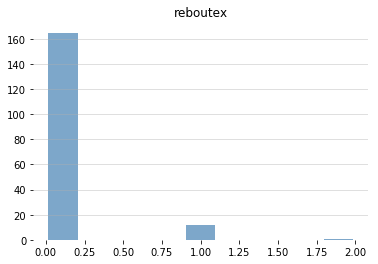

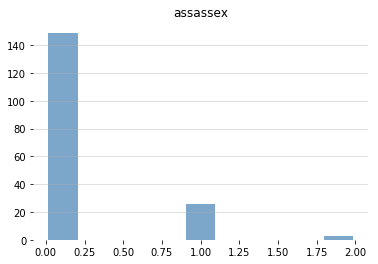

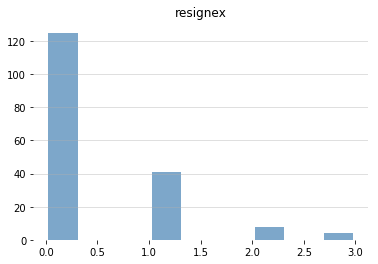

In [7]:
heads = ['scoup1', 'atcoup2', 'pcoup3', 'apcoup4', 'agcoup', 'foroutex',
         'reboutex', 'assassex', 'resignex']
for test in heads:
    n, bins, patches = plt.hist(x=coups_countries[test], bins='auto',
                               color='steelblue', alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=.5)
    plt.title(test)
    plt.box(False)
    plt.show()

Each of the histograms have a mode at 0 and trail to the right. This isn't surprising, but it is interesting how far to the right some of variables stretch. For example, `atcoup2` has up to 16 of these types of coups. But what about the total coups per country?

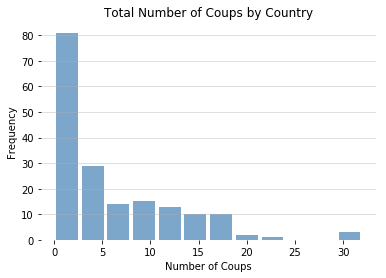

In [8]:
total_coups_country = coups_countries['scoup1'] + coups_countries['atcoup2'] + coups_countries['pcoup3'] + coups_countries['apcoup4'] + coups_countries['agcoup'] + coups_countries['foroutex'] + coups_countries['reboutex'] + coups_countries['assassex'] + coups_countries['resignex']
n, bins, patches = plt.hist(x=total_coups_country, bins='auto', color='steelblue',
                           alpha=.7, rwidth=.85)
plt.grid(axis='y', alpha=.5)
plt.xlabel('Number of Coups')
plt.ylabel('Frequency')
plt.title('Total Number of Coups by Country')
plt.box(False)
plt.show()


Now this is interesting. There are countries that have had over 30 coups since 1946. The maximum number of coups by country is 32. That means one country has had 32 coups in 73 years. That is a lot of upheaval.

#### Grouped by Year

Now let's change our lens and look at the same data split out by year.

In [9]:
pprint(coups_year.head(5))

      scoup1  atcoup2  pcoup3  apcoup4  agcoup  foroutex  reboutex  assassex  \
year                                                                           
1946       1        1       1        1       0         0         1         0   
1947       2        1       2        5       0         0         0         0   
1948       6        4       3        3       0         0         0         0   
1949       5        1       3        1       0         0         0         0   
1950       1        0       2        0       0         0         0         0   

      resignex  
year            
1946         0  
1947         0  
1948         0  
1949         0  
1950         0  


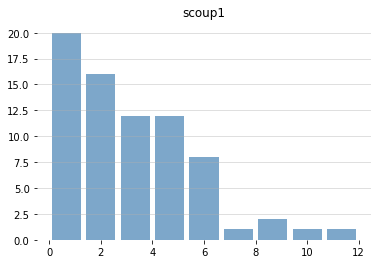

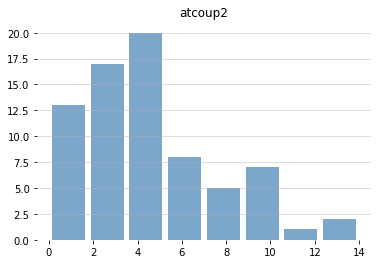

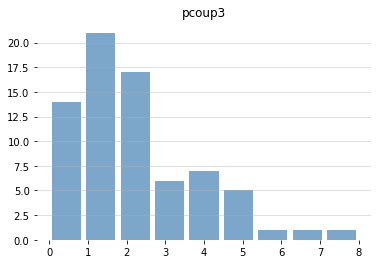

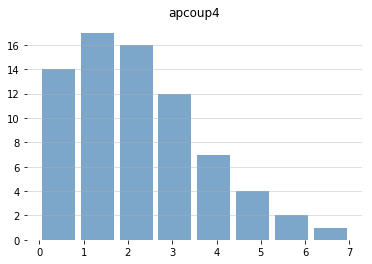

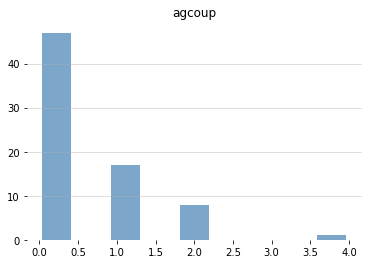

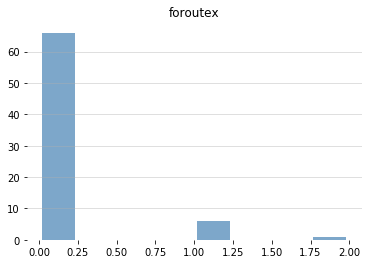

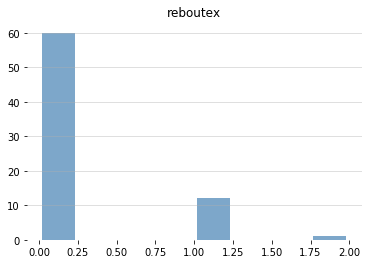

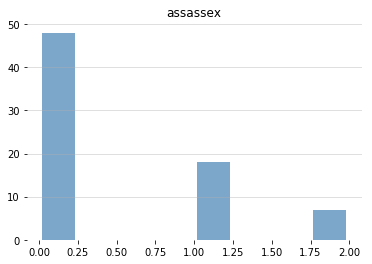

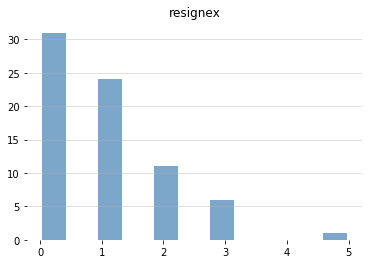

In [10]:
for test in heads:
    n, bins, patches = plt.hist(x=coups_year[test], bins='auto',
                               color='steelblue', alpha=.7, rwidth=.85)
    plt.grid(axis='y', alpha=.5)
    plt.title(test)
    plt.box(False)
    plt.show()

Ok, let's look at how the total number of coups is broken up by year.

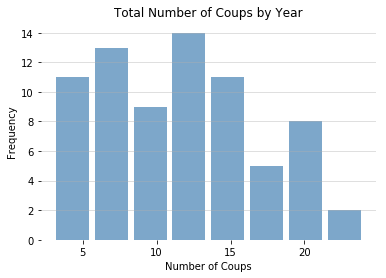

In [11]:
total_coups_year = coups_year['scoup1'] + coups_year['atcoup2'] + coups_year['pcoup3'] + coups_year['agcoup'] + coups_year['foroutex'] + coups_year['reboutex'] + coups_year['assassex'] + coups_year['resignex']
n, bins, patches = plt.hist(x=total_coups_year, bins='auto', color='steelblue',
                           alpha=.7, rwidth=.85)
plt.grid(axis='y', alpha=.5)
plt.xlabel('Number of Coups')
plt.ylabel('Frequency')
plt.title('Total Number of Coups by Year')
plt.box(False)
plt.show()

Now this was unexpected. This is almost a normal distribution.

### Displaced

Now it's time to look at the next dataset which is the number of displaced individuals. Let's look at the numbers grouped by country and by year.

In [12]:
displaced.head(5)

,ccode,scode,country,year,source,idp,host
0,2,USA,United States,1964,0.0,0.0,96.0
1,2,USA,United States,1965,0.0,0.0,95.0
2,2,USA,United States,1966,0.0,0.0,97.0
3,2,USA,United States,1967,0.0,0.0,906.0
4,2,USA,United States,1968,0.0,0.0,987.0


In [13]:
displaced_country = displaced.groupby('country').sum()[['source', 'host']]
displaced_year = displaced.groupby('year').sum()[['source', 'host']]

#### Grouped by Country

First up is the group by country.

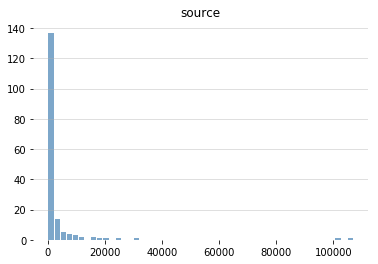

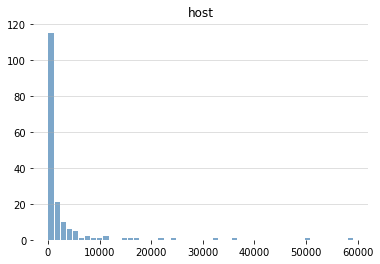

In [14]:
for x in ['source', 'host']:
    n, bins, patches = plt.hist(x=displaced_country[x], bins=50,
                               color='steelblue', alpha=.7, rwidth=.85)
    plt.grid(axis='y', alpha=.5)
    plt.title(x)
    plt.box(False)
    plt.show()

These histograms are not surprising. Most countries do not source or host displaced individuals. One interesting thing is that the sum of the source and hosts are not equal. This means that there are a fair number of uncounted individuals. But now let's look at the number of displaced individuals by year.

#### Grouped by Year

Now let's look at the number of displaced individuals over the years.

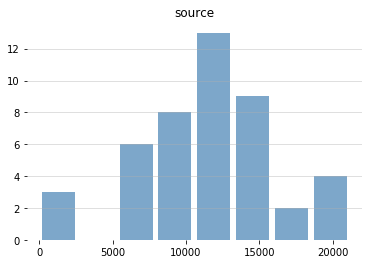

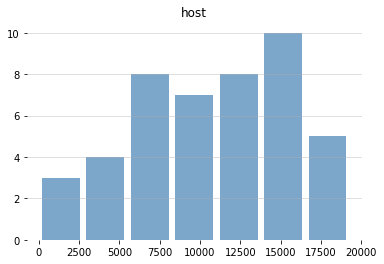

In [15]:
for x in ['source', 'host']:
    n, bins, patches = plt.hist(x=displaced_year[x], bins='auto',
                               color='steelblue', alpha=.7, rwidth=.85)
    plt.grid(axis='y', alpha=.5)
    plt.title(x)
    plt.box(False)
    plt.show()

These are both mostly normal. That is unexpected. But paired with the number of coups per year being normal as well, this shouldn't be as surprising. Now let's look at the fragility of the different countries.

### Fragility

Next up is looking at the `fragility` dataset. Each state's fragility index is the `sfi` variable, but is a combination of all the other variables. The closer the `sfi` is to zero, the more stable the country is. For my analysis, I will only be looking at the `sfi`, but there is much more data that can be gleaned from this dataset.

I will be grouping this data by the mean rather than the sum.

In [16]:
fragility_country = fragility.groupby('country').mean()[['sfi']]
fragility_year = fragility.groupby('year').mean()[['sfi']]

#### Grouped by Country

First up is to look at the grouped country data.

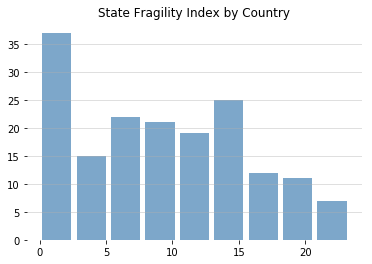

In [17]:
n, bins, patches = plt.hist(x=fragility_country['sfi'], bins='auto',
                           color='steelblue', alpha=.7, rwidth=.85)
plt.grid(axis='y', alpha=.5)
plt.title('State Fragility Index by Country')
plt.box(False)
plt.show()

#### Grouped by Year

Next up is to look at the `sfi` when it's grouped by year.

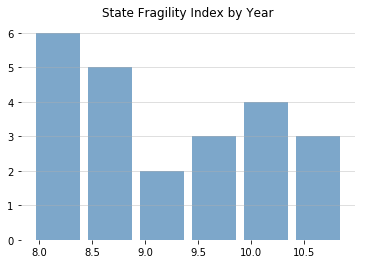

In [18]:
n, bins, patches = plt.hist(x=fragility_year['sfi'], bins='auto',
                           color='steelblue', alpha=.7, rwidth=.85)
plt.grid(axis='y', alpha=.5)
plt.title('State Fragility Index by Year')
plt.box(False)
plt.show()

Here we have the average state fragility index for each year. I was not expecting such a spread in the average over the years.

### RAND

Next up is to look at the RAND database of worldwide terrorism incidents (RDWTI) data. There are a couple of things to look at within this dataset. 

In [19]:
print('Number of Cities: ',len(list(set(rand['City']))),
      '\nNumber of Countries: ', len(list(set(rand['Country']))),
      '\nNumber of Perpetrators: ', len(list(set(rand['Perpetrator']))),
      '\nNumber of Weapons: ', len(list(set(rand['Weapon']))))

Number of Cities:  6387 
Number of Countries:  195 
Number of Perpetrators:  1060 
Number of Weapons:  13


In [20]:
rand_country = rand.groupby('Country').sum()[['Injuries', 'Fatalities']]
rand_perps = rand.groupby('Perpetrator').sum()[['Injuries', 'Fatalities']]
rand_weapons = rand.groupby('Weapon').sum()[['Injuries', 'Fatalities']]

#### Grouped by Country

First up is to look at the data when grouped by country

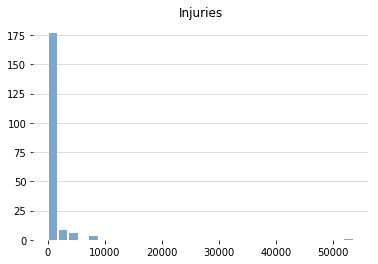

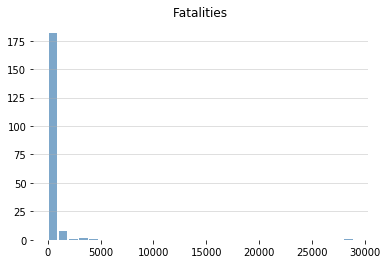

In [21]:
for x in ['Injuries', 'Fatalities']:
    n, bins, patches = plt.hist(x=rand_country[x], bins=30,
                               color='steelblue', alpha=.7, rwidth=.85)
    plt.grid(axis='y', alpha=.5)
    plt.title(x)
    plt.box(False)
    plt.show()

#### Grouped by Perpetrators

Now let's look at the data grouped by Perpetrators

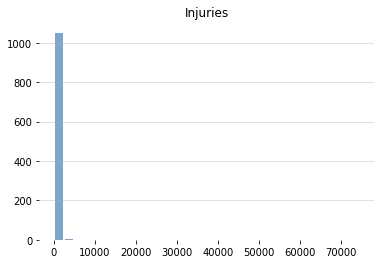

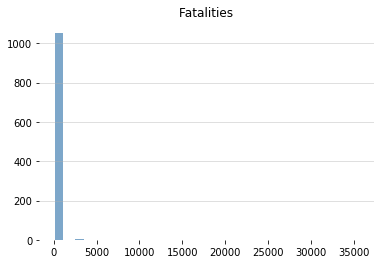

In [22]:
for x in ['Injuries', 'Fatalities']:
    n, bins, patches = plt.hist(x=rand_perps[x], bins=30,
                               color='steelblue', alpha=.7, rwidth=.85)
    plt.grid(axis='y', alpha=.5)
    plt.title(x)
    plt.box(False)
    plt.show()

Most terroristic attacks have a small number of injuries and fatalities.

#### Grouped by Weapon

Now let's see how they change by weapon type.

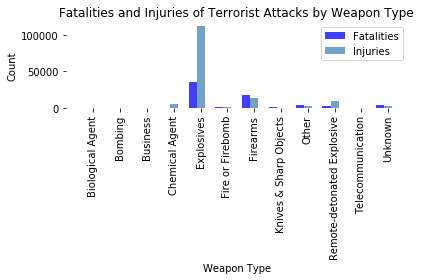

In [23]:
n_groups = 12

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = .3
opacity = .75

rects1 = plt.bar(index, rand_weapons['Fatalities'], bar_width, alpha=opacity,
                 color='blue', label="Fatalities")
rects2 = plt.bar(index + bar_width, rand_weapons['Injuries'], bar_width, alpha=opacity,
                color='steelblue', label="Injuries")
plt.xlabel('Weapon Type')
plt.ylabel('Count')
plt.title('Fatalities and Injuries of Terrorist Attacks by Weapon Type')
plt.xticks(index + bar_width,('Biological Agent', 'Bombing', 'Business',
                             'Chemical Agent', 'Explosives', 'Fire or Firebomb',
                             'Firearms', 'Knives & Sharp Objects', 'Other',
                             'Remote-detonated Explosive', 'Telecommunication',
                             'Unknown'), rotation='vertical')
plt.legend()

plt.tight_layout()
plt.box(False)
plt.show()

By far, the weapon that causes the most fatalities and injuries are explosives.

## Exploring Bi-Variate Relationships

To explore the bi-variate relationships, we need to first get the different data into a single dataframe, or into the same format. I'm gathering the data into a single dataframe.

### Correlation

The first bi-variate relationship I'm going to look at is the correlation between the different variables. I will look at this when the data is grouped by country and by year.

#### Grouped by Country

The first thing I'll need to do is reset the index on all of the grouped datasets. Once the index is reset, I can then merge the datasets together by country.

In [24]:
coups_countries = coups_countries.reset_index()
displaced_country = displaced_country.reset_index()
fragility_country = fragility_country.reset_index()
rand_country = rand_country.reset_index()
coups_year = coups_year.reset_index()
diplaced_year = displaced_year.reset_index()
fragility_year = fragility_year.reset_index()

# Need to rename columns to be the same between the different dataframes
rand_country = rand_country.rename(columns={'Country':'country', 'Injuries':'injuries',
                            'Fatalities':'fatalities'})

In [25]:
total_coups_country_df = total_coups_country.to_frame().reset_index()
total_coups_country_df.columns = ['country', 'total_coups']

In [26]:
country_df = pd.merge(coups_countries, total_coups_country_df, on='country')
country_df = pd.merge(country_df, displaced_country, on='country')
country_df = pd.merge(country_df, fragility_country, on='country')
country_df = pd.merge(country_df, rand_country, on='country')

In [27]:
country_df.head(5)

,country,scoup1,atcoup2,pcoup3,apcoup4,agcoup,foroutex,reboutex,assassex,resignex,total_coups,source,host,sfi,injuries,fatalities
0,Afghanistan,5,6,0,1,0,1,1,0,0,14,101363.1,144.0,22.391304,4789,4200
1,Albania,0,1,0,0,1,0,0,0,0,2,203.3,31.0,4.913043,20,6
2,Algeria,1,1,0,0,1,0,0,1,0,4,187.0,3725.5,15.260870,1890,1302
3,Angola,0,1,0,1,0,0,0,0,0,2,15423.5,1286.9,18.782609,216,358
4,Argentina,7,8,1,0,0,0,0,0,1,17,273.0,4253.2,3.000000,516,175


Now that we have a combined dataset for the grouping on the countries, we can look at how how the different countries are related together.

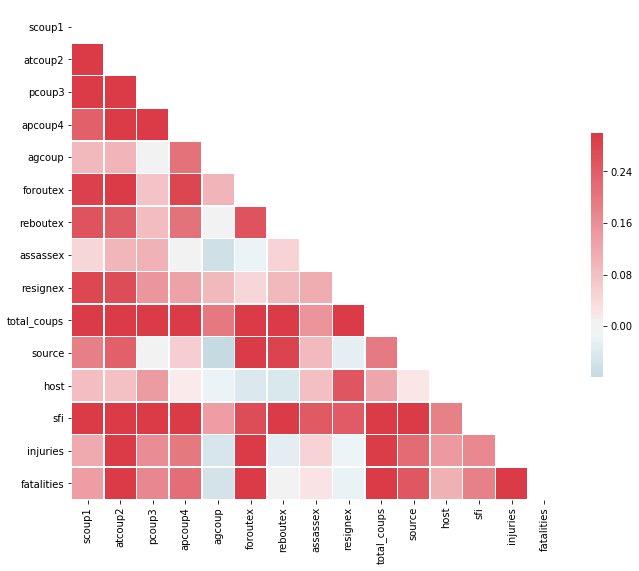

In [28]:
corr = country_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidth=.5, cbar_kws={'shrink':.5})

Well, now this is interesting. Most of the variables are positively correlated with each other to varying degress. The variables that seem to be the most important are `total_coups`, `sfi`, and `atcoup2`. The `total_coups` and `sfi` were expected, but it looks like a specific type of coup is highly correlated with terrorism. This is good to know as it is one of my research questions.

#### Grouped by Year

Now to do the same thing when the data is grouped by year.

In [29]:
total_coups_year_df = total_coups_year.to_frame().reset_index()
total_coups_year_df.columns = ['year', 'total_coups']

In [30]:
year_df = pd.merge(coups_year, total_coups_year_df, on='year')
year_df = pd.merge(year_df, displaced_year, on='year')
year_df = pd.merge(year_df, fragility_year, on='year')

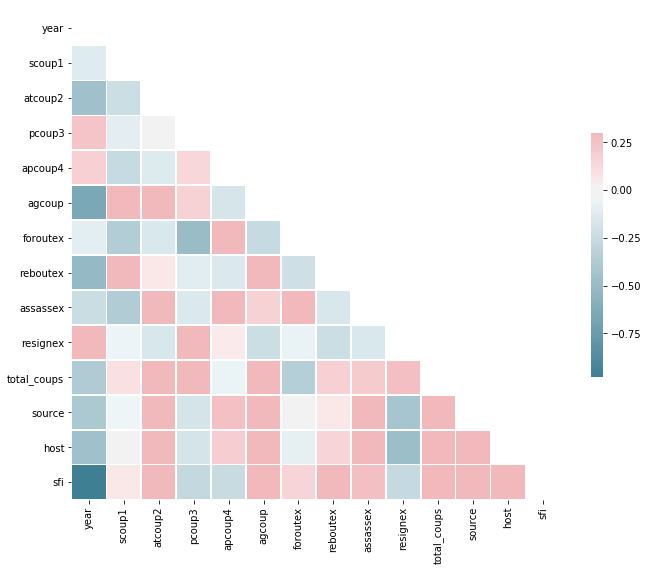

In [31]:
corr = year_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidth=.5, cbar_kws={'shrink':.5})

Now this is an interesting thing to see. When the data is grouped by year, the correlations are closer to 0 or negative, especially to the `year`. This implies that as time goes on, the amount of terrorism is decreasing.

### Scatterplots

The next thing to look at are the different scatterplots between the variables. I'll be looking at these based on how the data was grouped.

#### Grouped by Country

First up is to look at the data when it's grouped by country.

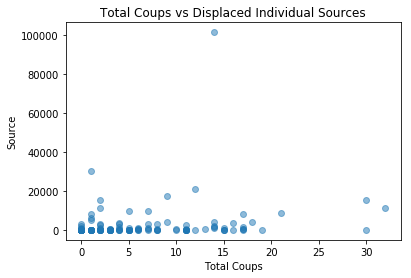

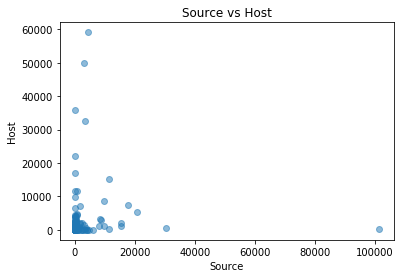

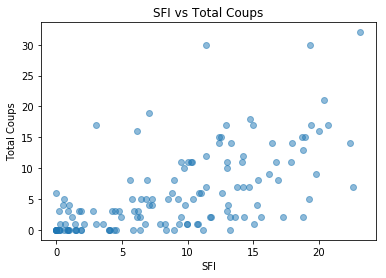

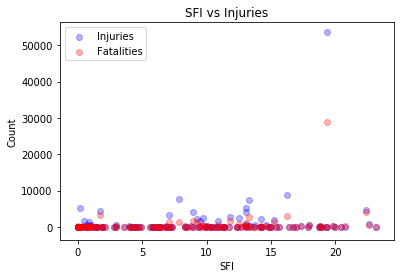

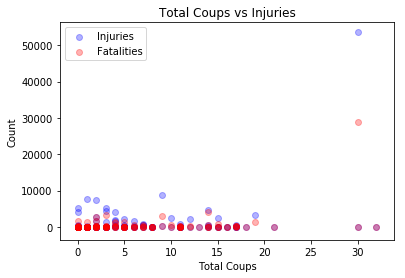

In [32]:
plt.scatter(x=country_df['total_coups'], y=country_df['source'], alpha=.5)
plt.xlabel('Total Coups')
plt.ylabel('Source')
plt.title('Total Coups vs Displaced Individual Sources')
plt.show()

plt.scatter(x=country_df['source'], y=country_df['host'], alpha=.5)
plt.xlabel('Source')
plt.ylabel('Host')
plt.title('Source vs Host')
plt.show()

plt.scatter(x=country_df['sfi'], y=country_df['total_coups'], alpha=.5)
plt.xlabel('SFI')
plt.ylabel('Total Coups')
plt.title('SFI vs Total Coups')
plt.show()

plt.scatter(x=country_df['sfi'], y=country_df['injuries'], alpha=.3, color='blue', label='Injuries')
plt.scatter(x=country_df['sfi'], y=country_df['fatalities'], alpha=.3, color='red', label='Fatalities')
plt.xlabel('SFI')
plt.ylabel('Count')
plt.title('SFI vs Injuries')
plt.legend()
plt.show()

plt.scatter(x=country_df['total_coups'], y=country_df['injuries'], alpha=.3, color='blue', label='Injuries')
plt.scatter(x=country_df['total_coups'], y=country_df['fatalities'], alpha=.3, color='red', label='Fatalities')
plt.xlabel('Total Coups')
plt.ylabel('Count')
plt.title('Total Coups vs Injuries')
plt.legend()
plt.show()

Here we can see some of the different scatter plots of the data.

#### Grouped by Year

Now it's time to look at the same scatterplots with the data grouped by year.

In [33]:
year_df

,year,scoup1,atcoup2,pcoup3,apcoup4,agcoup,foroutex,reboutex,assassex,resignex,total_coups,source,host,sfi
0,1995,1,10,4,3,2,0,0,1,0,18,14665.0,15320.0,10.877301
1,1996,3,7,2,2,2,0,1,0,1,16,13896.0,14465.0,10.564417
2,1997,3,1,1,2,0,0,1,0,0,6,12594.0,13548.0,10.466258
3,1998,0,2,0,4,0,1,0,0,0,3,12934.0,13459.0,10.325153
4,1999,4,2,1,0,1,0,0,0,1,9,13445.0,14070.0,10.300613
5,2000,0,10,1,1,0,0,0,0,2,13,14012.0,14542.0,10.276074
6,2001,0,4,0,4,0,1,0,2,1,8,14410.0,14921.0,10.042945
7,2002,1,2,1,2,0,0,0,0,0,4,12619.0,12997.0,9.884146
8,2003,2,2,1,3,0,1,0,0,2,8,12032.3,11849.6,9.762195
9,2004,0,2,6,1,0,0,0,0,3,11,11105.0,11491.0,9.548780


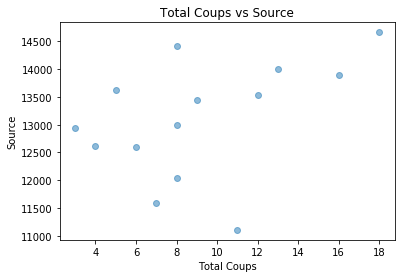

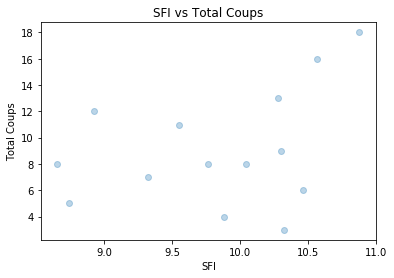

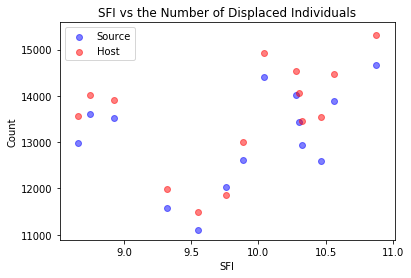

In [34]:
plt.scatter(x=year_df['total_coups'], y=year_df['source'], alpha=.5)
plt.xlabel('Total Coups')
plt.ylabel('Source')
plt.title('Total Coups vs Source')
plt.show()

plt.scatter(x=year_df['sfi'], y=year_df['total_coups'], alpha=.3)
plt.xlabel('SFI')
plt.ylabel('Total Coups')
plt.title('SFI vs Total Coups')
plt.show()

plt.scatter(x=year_df['sfi'], y=year_df['source'], alpha=.5, color='blue', label='Source')
plt.scatter(x=year_df['sfi'], y=year_df['host'], alpha=.5, color='red', label='Host')
plt.xlabel('SFI')
plt.ylabel('Count')
plt.legend()
plt.title('SFI vs the Number of Displaced Individuals')
plt.show()

Here we can see some of the scatterplots for the data grouped by year.

## Start Clustering

Now that we've looked at the data, we can start looking to try to use the data to see how the data groups together. I'm wondering how the data will be grouped together if we look at the `total_coups`, `source`, `host`, `sfi`, `injuries`, and `fatalities` variables. Would the groupings reflect along with the regions of the world? Or would they be grouped together in a different way? Can we infer anything from the different groupings?

In [35]:
country_df.head(5)

,country,scoup1,atcoup2,pcoup3,apcoup4,agcoup,foroutex,reboutex,assassex,resignex,total_coups,source,host,sfi,injuries,fatalities
0,Afghanistan,5,6,0,1,0,1,1,0,0,14,101363.1,144.0,22.391304,4789,4200
1,Albania,0,1,0,0,1,0,0,0,0,2,203.3,31.0,4.913043,20,6
2,Algeria,1,1,0,0,1,0,0,1,0,4,187.0,3725.5,15.260870,1890,1302
3,Angola,0,1,0,1,0,0,0,0,0,2,15423.5,1286.9,18.782609,216,358
4,Argentina,7,8,1,0,0,0,0,0,1,17,273.0,4253.2,3.000000,516,175


Another thought, what if we looked at the `rand` dataset and added each of the different details to this dataset? Then used clustering on both the `country_df` and the new combined `rand` data? How would clustering change between the two different datasets?

In [36]:
years = []
for t in range(len(rand['Date'])):
    try:
        years.append(rand['Date'][t].year)
    except:
        years.append('NaN')
        
rand['year'] = years

In [37]:
rand.head(3)

,Date,City,Country,Perpetrator,Weapon,Injuries,Fatalities,Description,year
0,1968-02-09,Buenos Aires,Argentina,Unknown,Firearms,0,0,ARGENTINA. The second floor of the U.S. embas...,1968
1,1968-02-12,Santo Domingo,Dominican Republic,Unknown,Explosives,0,0,DOMINICAN REPUBLIC. A homemade bomb was found...,1968
2,1968-02-13,Montevideo,Uruguay,Unknown,Fire or Firebomb,0,0,URUGUAY. A Molotov cocktail was thrown outsid...,1968


In [38]:
coups.head(3)

,ccode,scode,country,year,scoup1,atcoup2,pcoup3,apcoup4,agcoup,foroutex,reboutex,assassex,resignex
0,700,AFG,Afghanistan,1946,0,0,0,0,0,0,0,0,0
1,700,AFG,Afghanistan,1947,0,0,0,0,0,0,0,0,0
2,700,AFG,Afghanistan,1948,0,0,0,0,0,0,0,0,0


In [39]:
rand.dtypes

Date           datetime64[ns]
City                   object
Country                object
Perpetrator            object
Weapon                 object
Injuries                int64
Fatalities              int64
Description            object
year                    int64
dtype: object

In [40]:
coups.dtypes

ccode        int64
scode       object
country     object
year         int64
scoup1       int64
atcoup2      int64
pcoup3       int64
apcoup4      int64
agcoup       int64
foroutex     int64
reboutex     int64
assassex     int64
resignex     int64
dtype: object

In [41]:
# First, merge the rand and coups datasets
inc_df = rand.merge(coups, how='inner', left_on=['Country', 'year'], right_on=['country', 'year'])
# Now to clean up the columns and remove the data I don't want in the clustering
columns = ['ccode', 'scode', 'country']
inc_df.drop(columns, axis=1, inplace=True)

# Now, to merge inc_df and the displaced data
inc_df = inc_df.merge(displaced, how='inner', left_on=['Country', 'year'], right_on=['country', 'year'])
columns = ['ccode', 'scode', 'country']
inc_df.drop(columns, axis=1, inplace=True)

# Last, I need to merge inc_df and the fragility data
inc_df = inc_df.merge(fragility, how='inner', left_on=['Country', 'year'], right_on=['country', 'year'])
columns = ['scode', 'country', 'legit', 'seceff', 'secleg', 'poleff', 'polleg',
          'ecoeff', 'ecoleg', 'soceff', 'socleg']
inc_df.drop(columns, axis=1, inplace=True)

inc_df

,Date,City,Country,Perpetrator,Weapon,Injuries,Fatalities,Description,year,scoup1,...,foroutex,reboutex,assassex,resignex,source,idp,host,region,sfi,effect
0,1995-01-04,NaN,Sierra Leone,Revolutionary United Front (RUF),Unknown,0,9,SIERRA LEONE. A Swiss employee of a French lu...,1995,0,...,0,0,0,0,363.0,1000.0,15.0,1,23,11
1,1995-01-18,Mokanji,Sierra Leone,Revolutionary United Front (RUF),Unknown,0,0,"SIERRA LEONE. Two British, a German, an Austr...",1995,0,...,0,0,0,0,363.0,1000.0,15.0,1,23,11
2,1995-01-20,Gbangbatok,Sierra Leone,Revolutionary United Front (RUF),Unknown,0,0,SIERRA LEONE. Two British and one Sierra Leon...,1995,0,...,0,0,0,0,363.0,1000.0,15.0,1,23,11
3,1995-01-25,Kambia,Sierra Leone,Unknown,Unknown,0,0,SIERRA LEONE. The British-based charity organ...,1995,0,...,0,0,0,0,363.0,1000.0,15.0,1,23,11
4,1995-01-25,Kambia,Sierra Leone,Revolutionary United Front (RUF),Unknown,0,0,"SIERRA LEONE. Seven nuns, six Italian and one...",1995,0,...,0,0,0,0,363.0,1000.0,15.0,1,23,11
5,1995-04-10,NaN,Sierra Leone,Revolutionary United Front (RUF),Firearms,0,1,SIERRA LEONE. A convoy of cars belonging to t...,1995,0,...,0,0,0,0,363.0,1000.0,15.0,1,23,11
6,1995-05-18,Tombudu Town,Sierra Leone,Revolutionary United Front (RUF),Unknown,0,0,SIERRA LEONE. Three Lebanese businessmen were...,1995,0,...,0,0,0,0,363.0,1000.0,15.0,1,23,11
7,1995-01-12,al-Ashiyah,Egypt,al-Gama'at al-Islamiyya (IG),Firearms,6,0,EGYPT. Two Argentinians and four Egyptians we...,1995,0,...,0,0,0,0,0.0,0.0,10.0,2,16,8
8,1995-11-07,Luxor,Egypt,al-Gama'at al-Islamiyya (IG),Firearms,10,0,EGYPT. A tourist train from Luxor to Cairo wa...,1995,0,...,0,0,0,0,0.0,0.0,10.0,2,16,8
9,1995-11-09,Aswan,Egypt,al-Gama'at al-Islamiyya (IG),Firearms,3,0,EGYPT. Islamic extremists opened fire on a tr...,1995,0,...,0,0,0,0,0.0,0.0,10.0,2,16,8


One thing to note about this newly merged data, since it was an inner merge, we only kept the data that we have across all of the different datasets. Because of this, the data starts in 1995 rather than earlier. But now that we have our two datasets, the `country_df` and `inc_df`, we can start working on clustering the data.

To start with, I will be using k-Means Clustering.

### Feature Reduction - Principal Component Analysis

Before we jump right into working the k-Meas Clustering, I want to first reduce the number of features in `country_df` down to two for ease of visualization.

In [42]:
country_df.head(3)

,country,scoup1,atcoup2,pcoup3,apcoup4,agcoup,foroutex,reboutex,assassex,resignex,total_coups,source,host,sfi,injuries,fatalities
0,Afghanistan,5,6,0,1,0,1,1,0,0,14,101363.1,144.0,22.391304,4789,4200
1,Albania,0,1,0,0,1,0,0,0,0,2,203.3,31.0,4.913043,20,6
2,Algeria,1,1,0,0,1,0,0,1,0,4,187.0,3725.5,15.260870,1890,1302


In [43]:
country_midstep = country_df[['scoup1', 'atcoup2', 'pcoup3', 'apcoup4', 'agcoup', 'foroutex',
                            'reboutex', 'assassex', 'resignex', 'total_coups', 'source',
                            'host', 'sfi', 'injuries', 'fatalities']]

In [44]:
country_pca = PCA(n_components=2)
fit = country_pca.fit(country_midstep)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.50168516 0.3573909 ]
[[ 4.22469591e-05  7.92427931e-05  6.13192751e-06  1.23676555e-05
  -3.93914719e-06  9.46807924e-06  8.52039093e-06  4.26396014e-06
  -5.40450519e-07  1.57762168e-04  9.77795602e-01  9.71018122e-02
   2.40115503e-04  1.61162740e-01  9.22685132e-02]
 [ 1.68732197e-05  2.67013986e-05  2.74957359e-05  3.70244865e-06
  -4.91801548e-07 -1.84372953e-06 -3.25660568e-06  3.75802627e-06
   2.22745750e-05  9.52132674e-05 -1.20379958e-01  9.85508042e-01
   1.12831411e-04  1.10442913e-01  4.56607503e-02]]


We know that reducing the features down to two features means we lose most of the individual details of the different variables, but we can use this to help find the optimal k for our k-Means Clustering.

### Optimal K

To find the Optimal k value, I will be using the Elbow Method.

In [45]:
col1 = fit.components_[0]
col2 = fit.components_[1]
data = {'col1':col1, 'col2':col2}
pca_df = pd.DataFrame(data=data)

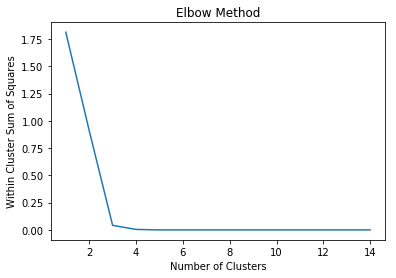

In [46]:
test = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_df)
    test.append(kmeans.inertia_)
plt.plot(range(1,15), test)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

Well now, that's pretty definitive for the PCA data. The optimal number of clusters is 3. Let's see what the clusters look like in two dimensions.

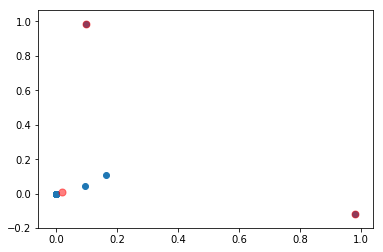

In [47]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pca_df)

plt.scatter(pca_df['col1'], pca_df['col2'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red', alpha=.5)
plt.show()

Ah, it makes sense why the optimal number of clusters is 3 for the PCA data. But how about the full data? Would we get the same "elbow" and the same clustering?bow"?

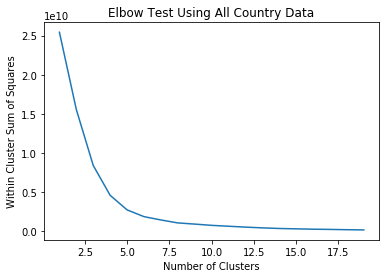

In [48]:
elbow_test = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(country_midstep)
    elbow_test.append(kmeans.inertia_)
plt.plot(range(1,20), elbow_test)
plt.title("Elbow Test Using All Country Data")
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

This is much more expected. There isn't a single "best" k to use, but a k between 3 and 6 seems to be appropriate. I'll go with 6 clusters for now.

### K-Means Clustering

Now it's time to start the actual k-Means Clustering. I'll be using 6 clusters when using the `country_midstep` data.

In [49]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10,
                random_state=0)
group = kmeans.fit_predict(country_midstep)
print(group)

[1 4 4 5 4 4 4 4 4 4 5 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 2 3 4 5 4 4 4 2 4 4 4 4 4 4 0 4 5 4 4
 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 5 4
 4 4 0 4 4 4 0 4 4 0 0 4 4 4 4 0 4 4 0 4 4 4 5 4 4 4]


Now that I have the clusters, let's assigned each cluster back to the country and print out the sorted list.

In [50]:
data = {'country':country_df['country'], 'group':group}
k_means_country = pd.DataFrame(data=data)
print(k_means_country.sort_values('group'))

           country  group
117          Syria      0
69         Lebanon      0
113          Sudan      0
120       Tanzania      0
121       Thailand      0
129  United States      0
126         Uganda      0
0      Afghanistan      1
55            Iran      2
92        Pakistan      2
62          Jordan      2
53           India      2
56            Iraq      3
74       Macedonia      4
70         Lesotho      4
93          Panama      4
91          Norway      4
90         Nigeria      4
89           Niger      4
88       Nicaragua      4
87     New Zealand      4
86     Netherlands      4
85           Nepal      4
72           Libya      4
82         Morocco      4
75      Madagascar      4
81        Mongolia      4
80         Moldova      4
79          Mexico      4
94        Paraguay      4
..             ...    ...
57         Ireland      4
54       Indonesia      4
52         Hungary      4
51        Honduras      4
50           Haiti      4
33         Ecuador      4
48          

Hmmm, interesting. Some of the countries are grouped together in ways I wouldn't have expected. I've saved the data to disc to create a visualizations of each country's grouping in Tableau.

![image.png](attachment:image.png)

Here we can see the Tableau mapping of the groupings. What I find interesting is that there does appear to be a gradual gradient to the adjacent countries. What I mean by this is that Group 0 is usually adjacent to Group 1 or 2, Group 1 is adjacent to either Group 0 or 3, and so on. The main exception to this is the United States. The US is grouped with Group 0 but is surrounded by Group 4 countries. It seems like geographic location is not the only indicator of terrorism.

But let's now look at the `inc_df` data, which contains each individual terrorist attack since 1995. I'm currious as to how the full data is grouped and how the the attacks are grouped together when sorted by weapon type.

#### Total `inc_df` Data

First up is looking at the total `inc_df` data. The first thing we'll do is see if we can determine what the best value of k is using the Elbow Method again.

In [51]:
inc_df.columns

Index(['Date', 'City', 'Country', 'Perpetrator', 'Weapon', 'Injuries',
       'Fatalities', 'Description', 'year', 'scoup1', 'atcoup2', 'pcoup3',
       'apcoup4', 'agcoup', 'foroutex', 'reboutex', 'assassex', 'resignex',
       'source', 'idp', 'host', 'region', 'sfi', 'effect'],
      dtype='object')

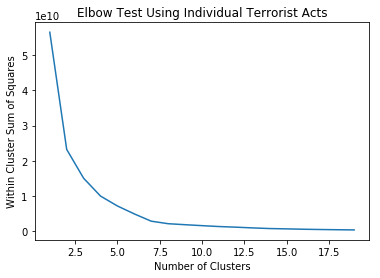

In [52]:
inc_midstep1 = inc_df[['Country','Injuries','Fatalities', 'year', 'scoup1', 'atcoup2',
                      'pcoup3', 'apcoup4', 'agcoup', 'foroutex', 'reboutex',
                      'assassex', 'resignex', 'source', 'idp', 'host',
                      'sfi', 'effect']]
inc_midstep1 = inc_midstep1.dropna()
inc_midstep2 = inc_midstep1.drop('Country', axis=1)
elbow_test = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,
                   random_state=0)
    kmeans.fit(inc_midstep2)
    elbow_test.append(kmeans.inertia_)
plt.plot(range(1,20), elbow_test)
plt.title("Elbow Test Using Individual Terrorist Acts")
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

This graph looks pretty similar to the last Elbow Test, so we will continue using 6 clusters to keep it the same.

Next up is to run k-Means Clustering.

In [53]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10,
               random_state=0)
group = kmeans.fit_predict(inc_midstep2)
print(group)

[0 0 0 ... 5 0 0]


Now let's put the data together into a single DataFrame.

In [54]:
data = {'country':inc_midstep1['Country'], 'year':inc_midstep1['year'],
       'cluster':group}
inc_cluster_df = pd.DataFrame(data=data)
inc_cluster_df

,country,year,cluster
0,Sierra Leone,1995,0
1,Sierra Leone,1995,0
2,Sierra Leone,1995,0
3,Sierra Leone,1995,0
4,Sierra Leone,1995,0
5,Sierra Leone,1995,0
6,Sierra Leone,1995,0
7,Egypt,1995,0
8,Egypt,1995,0
9,Egypt,1995,0


When all of the data is used, we get the following graphs for the following years:

1995:
![image.png](attachment:image.png)

1996:
![image.png](attachment:image.png)

1997:
![image.png](attachment:image.png)

1998:
![image.png](attachment:image.png)

1999:
![image.png](attachment:image.png)

2000:
![image.png](attachment:image.png)

2001:
![image.png](attachment:image.png)

2002:
![image.png](attachment:image.png)

2003:
![image.png](attachment:image.png)

2004:
![image.png](attachment:image.png)

2005:
![image.png](attachment:image.png)

2006:
![image.png](attachment:image.png)

2007:
![image.png](attachment:image.png)

2008:
![image.png](attachment:image.png)

Here are all of the different years. But how are they grouped when all of the different years are combined?

1995-2008:
![image.png](attachment:image.png)

What I find interesting is that most of the different countries were placed into similar clusters when we look at all of the individual terrorist attacks as when we looked at the combination of the data. One of the big differences, once again, is the United States. When compared to each individual terrorist attack, the US is grouped along with Canada and Mexico.

What really fascinates me is that the region coding of each country was removed from the data before the k-Means Clustering was completed. But we can still see the different clusters do seem to correspond to geographical regions.

## Further Research

Further research can be done into how the different acts of terrorisme are clustered together based on what type of weapon is used.

## Sources:

* National Consortium for the Study of Terrorism and Responses to Terrorism (START). (2018). Global Terrorism Database. Retrieved 28 Sep. 2019 from https://www.start.umd.edu/gtd
* Roser, M., Nagdy, M., Ritchie, H. (July 2013) “Terrorism.” Our World in Data. Retrieved 28 Sep. 2019 from https://ourworldindata.org/terrorism
* “Forcibly Displaced Populations, 1964-2008.” Integrated Network for Societal Conflict Research Center for Systemic Peace. Retrieved 28 Sep. 2019 from http://www.systemicpeace.org/inscrdata.html
* “Coups d’Etat, 1946-2018.” Integrated Network for Societal Conflict Research Center for Systemic Peace. Retrieved 28 Sep. 2019 from http://www.systemicpeace.org/inscrdata.html
* “State Fragility Index and Matrix, Time-Series Data, 1995-2017.” Integrated Network for Societal Conflict Research Center for Systemic Peace. Retrieved 28 Sep. 2019 from http://www.systemicpeace.org/inscrdata.html
* “Political instability task force worldwide atrocities dataset.” The Computational Event Data System. Retrieved 28 Sep. 2019 from http://eventdata.parusanalytics.com/data.dir/atrocities.html
* “RAND database of worldwide terrorism incidents (RDWTI).” Rand Corporation. Retrieved 28 Sep. 2019 from https://www.rand.org/nsrd/projects/terrorism-incidents/download.html
* Sundberg, Ralph, and Erik Melander, 2013, “Introducing the UCDP Georeferenced Event Dataset”, Journal of Peace Research, vol.50, no.4, 523-532. Retrieved 28 Sep. 2019 from https://www.ucdp.uu.se/downloads/
* Högbladh Stina, 2019, “UCDP GED Codebook version 19.1”, Department of Peace and Conflict Research, Uppsala University. Retrieved 28 Sep. 2019 from https://www.ucdp.uu.se/downloads/
